In [613]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import chi2

In [614]:
with open("input.txt", 'r') as file:
    data = file.readlines()
    
data[0] = data[0][:-1]
xi = data[0].split('_')
for it in range(len(xi)):
    temp = xi[it].split('-')
    xi[it] = [float(temp[0]), float(temp[1])]
ni = data[1].split('_')
for it in range(len(ni)):
    ni[it] = float(ni[it])
data = [xi, ni]

In [615]:
def build_histogram(data):
    plt.bar(range(len(data[1])), data[1])
    plt.xticks(range(len(data[0])), data[0], rotation=45)
    plt.show()

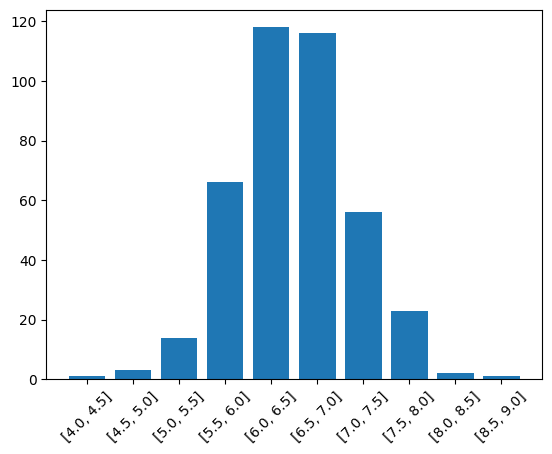

In [616]:
build_histogram(data)

In [617]:
with open("dod2.txt", 'r') as file:
    dod2 = file.readlines()
dod2 = [it.split('\t') for it in dod2]
for it in range(len(dod2)):
    dod2[it] = dod2[it][1:-1]
for it in range(len(dod2)):
    for jt in range(len(dod2[it])):
        dod2[it][jt] = dod2[it][jt].replace(',', '.')
        dod2[it][jt] = float(dod2[it][jt])

In [618]:
def getnu(x):
    flag = 0
    if x < 0:
        flag = 1
    x = abs(x)
    row = math.modf(x*10)[1]
    col = int((x*10 - row)*10)
    if row > 39:
        if flag == 0:
            return 0.5
        else:
            return -0.5
    else :
        if flag == 0:
            return dod2[int(row)][col]
        else:
            return -dod2[int(row)][col]

In [619]:
data.append([])
for it in data[0]:
    data[2].append((it[0] + it[1])/2)

In [620]:
def find_mean(data):
    summ = 0
    for it in range(len(data[0])):
        summ += data[2][it]*data[1][it]
    return summ/sum(data[1])

In [621]:
def deviation(data, mean):
    summ = 0
    for it in range(len(data[0])):
        summ += (data[2][it] - mean)**2*data[1][it]
    return summ

In [622]:
def find_standart(data, mean):
    return (deviation(data, mean)/(sum(data[1])-1))**0.5

In [623]:
def find_probs(data, mean, standart):
    probs = []
    for i in range(len(data[0])-1):
        if i == 0:
            probs.append(getnu((data[0][i][1] - mean)/standart)  - getnu(-9999))
        else:
            probs.append(getnu((data[0][i][1] - mean)/standart)  - getnu((data[0][i][0] - mean)/standart))
    probs.append(1 - sum(probs))
    return probs

In [624]:
def find_emp(data, mean, standart, probs):
    asmp = 0
    for i in range(len(data[0])):
        asmp += ((data[1][i] - sum(data[1])*probs[i])**2)/(sum(data[1])*probs[i])
    return asmp

In [625]:
count = 0
alpha = input("Enter alpha: ")
if alpha == '':
    alpha = 0.05
else:
    alpha = float(alpha)
mean = input("Enter mean: ")
if mean == '':
    count +=1
    mean = find_mean(data)
else:
    mean = float(mean)
standart = input("Enter standart: ")
if standart == '':
    count +=1
    standart = find_standart(data, mean)
else:
    standart = float(standart)

In [626]:
def find_crit(data, alpha, count):
    return chi2.ppf(1-alpha, len(data[0])-1-count)

In [627]:
def fix_data(data, probbs):
    while data[1][0] < 5 or (sum(data[1])*probbs[0] < 8):
        data[0][1] = [data[0][0][0], data[0][1][1]]
        data[1][1] += data[1][0]
        data[2][1] = (data[0][1][0] + data[0][1][1])/2
        probbs[1] = probbs[0] + probbs[1]
        probbs.pop(0)
        data[1].pop(0)
        data[0].pop(0)
        data[2].pop(0)
    
    while data[1][-1] < 5 or (sum(data[1])*probbs[-1] < 8):
        data[0][-2] = [data[0][-2][0], data[0][-1][1]]
        data[1][-2] += data[1][-1]
        data[2][-2] = (data[0][-2][0] + data[0][-2][1])/2
        probbs[-2] = probbs[-2] + probbs[-1]
        probbs.pop(-1)
        data[1].pop(-1)
        data[0].pop(-1)
        data[2].pop(-1)
    return data, probbs

In [628]:
probs = find_probs(data, mean, standart)

In [629]:
def print_data(data, probs):
    print("Xi          ", "Ni     ", "Xi*     ", "P")
    for i in range(len(data[0])):
        print(data[0][i], '|', data[1][i], '|', data[2][i], '|', probs[i])

In [630]:
data, probs = fix_data(data, probs)

In [631]:
emp = find_emp(data, mean, standart, probs)

In [632]:
crit = find_crit(data, alpha, count)

In [633]:
print_data(data, probs)

Xi           Ni      Xi*      P
[4.0, 5.5] | 18.0 | 4.75 | 0.06059999999999999
[5.5, 6.0] | 66.0 | 5.75 | 0.16000000000000003
[6.0, 6.5] | 118.0 | 6.25 | 0.2794
[6.5, 7.0] | 116.0 | 6.75 | 0.2764
[7.0, 7.5] | 56.0 | 7.25 | 0.1618
[7.5, 9.0] | 26.0 | 8.25 | 0.06180000000000013


In [634]:
if emp < crit:
    print(f"Емпіричне {emp} < критичне {crit} Гіпотеза не суперечить")
else:
    print(f"Емпіричне {emp} > критичне {crit} Гіпотеза суперечить")

Емпіричне 3.526071287568195 < критичне 7.814727903251179 Гіпотеза не суперечить


In [635]:
with open("input2.txt", 'r') as file:
    data2 = file.readlines()
    
data2[0] = data2[0][:-1]
xi = data2[0].split('_')
for it in range(len(xi)):
    temp = xi[it].split('-')
    xi[it] = [float(temp[0]), float(temp[1])]
ni = data2[1].split('_')
for it in range(len(ni)):
    ni[it] = float(ni[it])
data2 = [xi, ni]
data2.append([])
for it in data2[0]:
    data2[2].append((it[0] + it[1])/2)

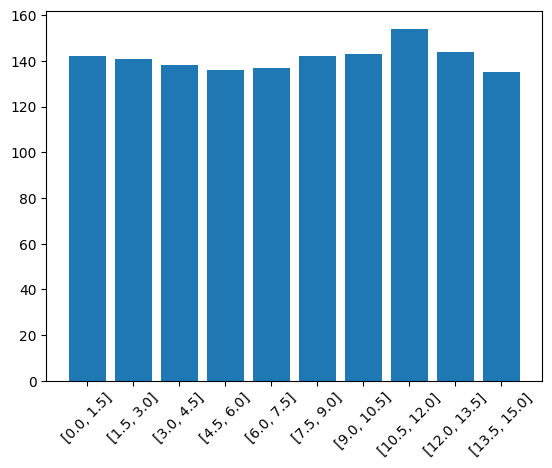

In [636]:
build_histogram(data2)

In [637]:
count2 = 0
alpha2 = input("Enter alpha: ")
if alpha2 == '':
    alpha2 = 0.05
else:
    alpha2 = float(alpha2)
mean2 = input("Enter mean: ")
if mean2 == '':
    count2 +=1
    mean2 = find_mean(data2)
else:
    mean2 = float(mean2)
standart2 = input("Enter standart: ")
if standart2 == '':
    count2 +=1
    standart2 = find_standart(data2, mean2)
else:
    standart2 = float(standart2)

In [638]:
mean2 = find_mean(data2)

In [639]:
standart2 = find_standart(data2, mean2)

In [640]:
def find_a_b(mean, standart):
    a = mean - ((3**0.5)*standart)
    b = mean + ((3**0.5)*standart)
    return a, b

In [641]:
a, b = find_a_b(mean2, standart2)

In [642]:
def fix_data2(data, probs):
    for i in range(len(data[0])-1):
        if data[1][i] < 5 or probs[i]*sum(data[1]) < 8:
            data[1][i] = data[1][i] + data[1][i+1]
            data[0][i] = [data[0][i][0], data[0][i+1][1]]
            data[2][i] = (data[0][i][0] + data[0][i][1])/2
            probs[i] = probs[i] + probs[i+1]
            probs.pop(i+1)
            data[1].pop(i+1)
            data[0].pop(i+1)
            data[2].pop(i+1)
    
    for i in range(len(data[0])-1):
        nn = len(data[0])-1
        if data[1][nn-i] < 5 or probs[nn-i]*sum(data[1]) < 8:
            data[1][nn-i] = data[1][nn-i] + data[1][nn-i-1]
            data[0][nn-i-1] = [data[0][nn-i-1][0], data[0][nn-i][1]]
            data[2][nn-i-1] = (data[0][nn-i-1][0] + data[0][nn-i-1][1])/2
            probs[nn-i-1] = probs[nn-i-1] + probs[nn-i]
            probs.pop(nn-i)
            data[1].pop(nn-i)
            data[0].pop(nn-i)
            data[2].pop(nn-i)
            
    return data, probs            

In [643]:
def find_probs2(data, a, b):
    probs = []
    for i in range(len(data[0])-1):
        if i == 0:
            probs.append(((data[0][i][1] - a)/(b - a)) - ((a - a)/(b - a)))
        else:
            probs.append(((data[0][i][1] - a)/(b - a)) - ((data[0][i][0] - a)/(b - a)))
    probs.append(1 - sum(probs))
    return probs

In [644]:
probs2 = find_probs2(data2, a, b)

In [645]:
data2, probs2 = fix_data2(data2, probs2)

In [646]:
emp2 = find_emp(data2, mean2, standart2, probs2)

In [647]:
crit2 = find_crit(data2, alpha2, count2)

In [648]:
print_data(data2, probs2)

Xi           Ni      Xi*      P
[0.0, 1.5] | 142.0 | 0.75 | 0.09538595572789493
[1.5, 3.0] | 141.0 | 2.25 | 0.10058363213243177
[3.0, 4.5] | 138.0 | 3.75 | 0.10058363213243171
[4.5, 6.0] | 136.0 | 5.25 | 0.10058363213243177
[6.0, 7.5] | 137.0 | 6.75 | 0.10058363213243177
[7.5, 9.0] | 142.0 | 8.25 | 0.10058363213243171
[9.0, 10.5] | 143.0 | 9.75 | 0.10058363213243182
[10.5, 12.0] | 154.0 | 11.25 | 0.10058363213243171
[12.0, 13.5] | 144.0 | 12.75 | 0.10058363213243171
[13.5, 15.0] | 135.0 | 14.25 | 0.0999449872126511


In [649]:
if emp2 < crit2:
    print(f"Емпіричне {emp2} < критичне {crit2} Гіпотеза не суперечить")
else:
    print(f"Емпіричне {emp2} > критичне {crit2} Гіпотеза суперечить")

Емпіричне 2.261592589159303 < критичне 14.067140449340167 Гіпотеза не суперечить
